# Martingale Betting System
## And the tragedies of betting

In the state of gambling, everyone images how excited they would be if they win that grand prize in a game of chance, but how do you recover if you loose? One method gambling lovers use is known not by its name but by its concept. The Martingale Betting System states that if one were to loose a game, they must double their bet to recover their losses. How would this result when played out?

This Jupyter Notebook attempts to demonstrate two hypothetical scenarios with our gambler:
1. The gambler has unlimited amount of money and must make <span>\$80</span> to be declared a successful run.
2. The gambler has a limited amount of money (or a bankroll) of <span>\$300</span>, but must still make the same <span>\$80</span> to be declared a successful run.

The gambler will make 500 bets per "run" with each run being independently of each other.

In Scenario 1, the gambler must make <span>\$80</span> but they have as much money to play around until they reach that <span>\$80</span> winning amount.

In Scenario 2, the gambler only has about <span>\$300</span> to gamble in hopes to reach that <span>\$80</span> winning amount. If they go under (which is -<span>\$300</span>), their run ends and no more bets are placed, effectively declaring a bankrupt run.

The code cells below is a simulation of the scenarios listed.


In [2]:
!pip install jupyterlab matplotlib pandas


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

def martingale_gambling_simulator(limit_amt=None):
    total_winnings = 0
    bets_per_run = 500
    bet_amount = 1
    bet_count = 0
    win_rate = (18 / 38)  # All possible wins of 18 winning spots [including 0 and 00 spots] out of 38
    top_limit = 80

    winnings_history = np.zeros(bets_per_run + 1)

    while bet_count < bets_per_run:
        bet_count += 1

        if total_winnings < top_limit and (limit_amt is None or total_winnings > -limit_amt):

            if limit_amt is not None:
                bet_amount = min(bet_amount, limit_amt + total_winnings)

            won = False
            if np.random.random() <= win_rate:
                won = True

            if won:
                total_winnings += bet_amount
                bet_amount = 1
            else:
                total_winnings -= bet_amount
                if limit_amt is None:
                    # We have unlimited bets because we have no limit to our amount
                    bet_amount *= 2
                elif limit_amt is not None:
                    # Your bet_amount can only be within the limits with at least bet_amount >= limit_amt
                    bet_amount = min(bet_amount * 2, limit_amt + total_winnings)

        if total_winnings >= top_limit:
            total_winnings = top_limit
        elif limit_amt is not None and total_winnings <= -limit_amt:
            total_winnings = -limit_amt

        winnings_history[bet_count] = total_winnings
    return winnings_history


if __name__ == "__main__":
    graphDirectory = os.path.join(os.getcwd(), "graphs")
    if not os.path.exists(graphDirectory):
        os.makedirs(graphDirectory)

## Experiment 1

Experiment 1 shows the results of 10 runs, with each run placing 500 bets. The graph displays how many bets it took before the gambler won the <span>\$80</span> amount required. Keep in mind that the gambler has an unlimited amount of money to bet so loss is not taken account for, only reaching <span>\$80</span> in profit to win.

As shown in the graph, the better loses their earnings multiple times before making a recovery. Since the gambler has the luxury of an unlimited amount of money, they will hit their <span>\$80</span> winning goal 100% of the time by the end of each run.


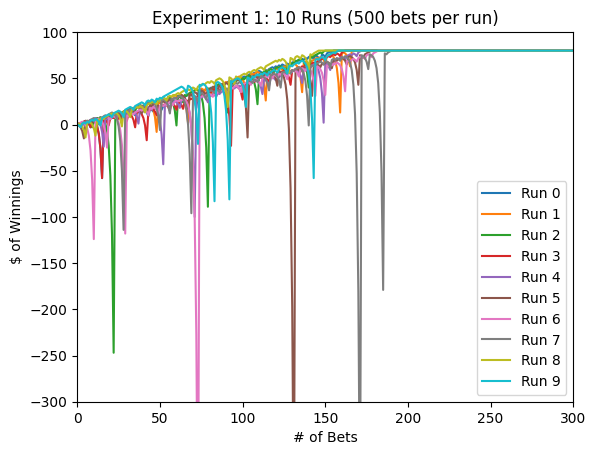

In [2]:
def experiment_1():
    df = pd.DataFrame()

    for run in range(10):
        winning = martingale_gambling_simulator()
        df[f"Run {run}"] = pd.Series(winning)

    ax = df.plot(title="Experiment 1: 10 Runs (500 bets per run)")
    ax.set_xlabel("# of Bets")
    ax.set_ylabel("$ of Winnings")
    ax.set_xlim(0, 300)
    ax.set_ylim(-300, 100)
    plt.savefig("graphs/experiment_1.png")
    plt.show()
    plt.close()

experiment_1()



## Experiment 2

Experiment 2 is similar to Experiment 1, with the expection that there are 1000 runs instead of 10,while keeping the 500 bets per run. The graph displays the mean and the standard deviation, both above and below the mean line. The purpose is to visualize the volatility of the result of each run. Similar to Test 1, there is no limit on the money spent to reach the winning profit amount.

Similar to Experiment 1, since the gambler has an unlimited amount of money to gamble with, they will hit their \$80 winning limit 100% of the time.

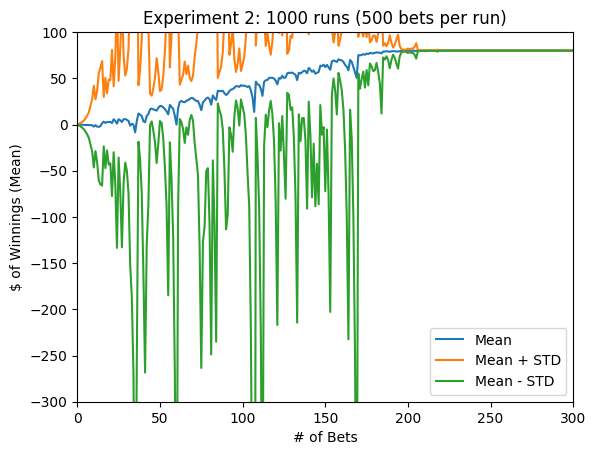

In [3]:
def experiment_2():
    df = pd.DataFrame()

    for run in range(1000):
        winning = martingale_gambling_simulator()
        df[f"Run {run}"] = pd.Series(winning)

    df_mean = df.mean(axis=1)
    df_std = df.std(axis=1)
    df_mean_plus_std = df_mean + df_std
    df_mean_minus_std = df_mean - df_std

    ax = df_mean.plot(title="Experiment 2: 1000 runs (500 bets per run)", label='Mean')
    df_mean_plus_std.plot(label="Mean + STD", ax=ax)
    df_mean_minus_std.plot(label="Mean - STD", ax=ax)

    ax.set_xlabel("# of Bets")
    ax.set_ylabel("$ of Winnings (Mean)")
    ax.set_xlim(0, 300)
    ax.set_ylim(-300, 100)

    ax.legend()

    plt.savefig("graphs/experiment_2.png")
    plt.show()
    plt.close()

experiment_2()

## Experiment 3

The goal of Experiment 3 is to calculate the results of 1000 runs, each run being 500 bets as usual. The difference here is that the gambler now has a limited amount of money to work with, <span>\$300</span> to be exact. Therefore, they cannot lose more than -<span>\$300</span>, otherwise the entire run ends. The winning amount of <span>\$80</span> has not changed. The graph shows the standard deviation, both above and below the mean line, to visualize the volatility in each run. Over the long run, the gambler will lose more than they make due to the added risk of going bankrupt on each run.

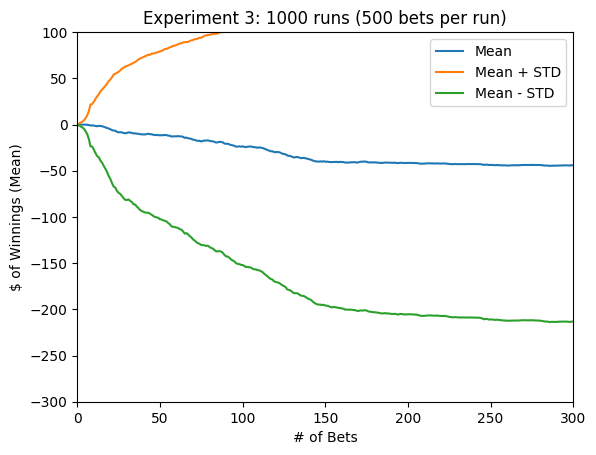

In [4]:
def experiment_3():
    df = pd.DataFrame()

    for run in range(1000):
        winning = martingale_gambling_simulator(limit_amt=300)
        df[f"Run {run}"] = pd.Series(winning)

    df_mean = df.mean(axis=1)
    df_std = df.std(axis=1)
    df_mean_plus_std = df_mean + df_std
    df_mean_minus_std = df_mean - df_std

    ax = df_mean.plot(title="Experiment 3: 1000 runs (500 bets per run)", label='Mean')
    df_mean_plus_std.plot(label="Mean + STD", ax=ax)
    df_mean_minus_std.plot(label="Mean - STD", ax=ax)

    ax.set_xlabel("# of Bets")
    ax.set_ylabel("$ of Winnings (Mean)")
    ax.set_xlim(0, 300)
    ax.set_ylim(-300, 100)

    ax.legend()

    plt.savefig("graphs/experiment_3.png")
    plt.show()
    plt.close()

experiment_3()

# Conclusion

While the dreams of walking into a casino and become that one person of the night to make it big may clog ones brain, there is a reason why the quote, "The house always wins" has never been more true. Overall, doubling your bet to make back your losses sounds like a good idea while under pressure but the reality is more grim than imagined. Therefore, its conclusive to say that the Martingale Betting System may be a rule for those strong determination but not practical in mathematical terms.